<a href="https://colab.research.google.com/github/Dragonwinner/NLP_Coursera/blob/main/week_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Preprocessing
#In this lab, we will be exploring how to preprocess tweets for sentiment analysis. We will provide a function for preprocessing tweets during this week's assignment, but it is still good to know what is going on under the hood. By the end of this lecture, you will see how to use the NLTK package to perform a preprocessing pipeline for Twitter datasets.

In [2]:
#You will be doing sentiment analysis on tweets in the first two weeks of this course. To help with that, we will be using the Natural Language Toolkit (NLTK) package, an open-source Python library for natural language processing. It has modules for collecting, handling, and processing Twitter data, and you will be acquainted with them as we move along the course.

#For this exercise, we will use a Twitter dataset that comes with NLTK. This dataset has been manually annotated and serves to establish baselines for models quickly. Let us import them now as well as a few other libraries we will be using.

In [3]:
import nltk                                # Python library for NLP
from nltk.corpus import twitter_samples    # sample Twitter dataset from NLTK
import matplotlib.pyplot as plt            # library for visualization
import random                              # pseudo-random number generator

In [4]:
# About the Twitter dataset

The sample dataset from NLTK is separated into positive and negative tweets. It contains 5000 positive tweets and 5000 negative tweets exactly. The exact match between these classes is not a coincidence. The intention is to have a balanced dataset. That does not reflect the real distributions of positive and negative classes in live Twitter streams. It is just because balanced datasets simplify the design of most computational methods that are required for sentiment analysis. However, it is better to be aware that this balance of classes is artificial.

You can download the dataset in your workspace (or in your local computer) by doing:

In [5]:
# downloads sample twitter dataset.
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.


True

We can load the text fields of the positive and negative tweets by using the module's strings() method like this:

In [6]:
# select the set of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

Next, we'll print a report with the number of positive and negative tweets. It is also essential to know the data structure of the datasets

In [7]:
print('Number of positive tweets: ', len(all_positive_tweets))
print('Number of negative tweets: ', len(all_negative_tweets))

print('\nThe type of all_positive_tweets is: ', type(all_positive_tweets))
print('The type of a tweet entry is: ', type(all_negative_tweets[0]))

Number of positive tweets:  5000
Number of negative tweets:  5000

The type of all_positive_tweets is:  <class 'list'>
The type of a tweet entry is:  <class 'str'>


We can see that the data is stored in a list and as you might expect, individual tweets are stored as strings.

You can make a more visually appealing report by using Matplotlib's pyplot library. Let us see how to create a pie chart to show the same information as above. This simple snippet will serve you in future visualizations of this kind of data.

In [8]:
# Declare a figure with a custom size
fig = plt.figure(figsize=(10, 10))

<Figure size 720x720 with 0 Axes>

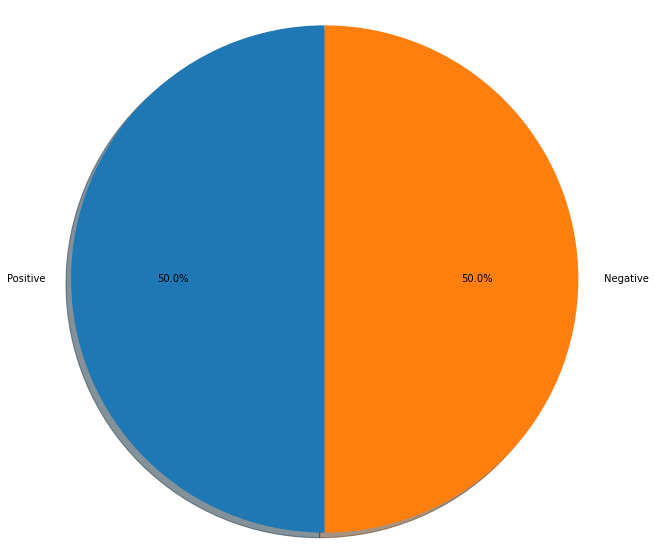

In [19]:
# Declare a figure with a custom size
fig = plt.figure(figsize=(10, 10))

labels='Positive','Negative'
sizes=[len(all_positive_tweets),len(all_negative_tweets)]
plt.pie(sizes,labels=labels , shadow=True, startangle=90,autopct='%1.1f%%')

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')  

# Display the chart
plt.show()






In [10]:
# print positive in greeen
print('\033[92m' + all_positive_tweets[random.randint(0,5000)])

# print negative in red
print('\033[91m' + all_negative_tweets[random.randint(0,5000)])

i beat sehun :-)
tbh i prefer apmas14 idk man theres something not right with this years apmas :(


Before anything else, we can print a couple of tweets from the dataset to see how they look. Understanding the data is responsible for 80% of the success or failure in data science projects. We can use this time to observe aspects we'd like to consider when preprocessing our data.

Below, you will print one random positive and one random negative tweet. We have added a color mark at the beginning of the string to further distinguish the two. (Warning: This is taken from a public dataset of real tweets and a very small portion has explicit content.)

One observation you may have is the presence of emoticons and URLs in many of the tweets. This info will come in handy in the next steps.

Preprocess raw text for Sentiment analysis
Data preprocessing is one of the critical steps in any machine learning project. It includes cleaning and formatting the data before feeding into a machine learning algorithm. For NLP, the preprocessing steps are comprised of the following tasks:

Tokenizing the string
Lowercasing
Removing stop words and punctuation
Stemming
The videos explained each of these steps and why they are important. Let's see how we can do these to a given tweet. We will choose just one and see how this is transformed by each preprocessing step.

In [26]:
# Our selected sample. Complex enough to exemplify each step
tweet = all_positive_tweets[2771]
print(tweet)

Sneakers of the day :) #nike #nikeoriginal #nikeindonesia #pierojogger #skoy https://t.co/9Kt7dxxNYD


 Preprocess raw text for Sentiment analysis

Let's import a few more libraries for this purpose.

In [27]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
import re
import string

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer


Remove hyperlinks, Twitter marks and styles

In [38]:
print('\033[92m'+tweet)
print('\033[94m')

tweet2=re.sub(r'^RT[\s]+','' ,tweet)

tweet2=re.sub(r'https?://[^\s\n\r]+','',tweet2)

tweet2=re.sub(r'#','',tweet2)


print(tweet2)


Sneakers of the day :) #nike #nikeoriginal #nikeindonesia #pierojogger #skoy https://t.co/9Kt7dxxNYD

Sneakers of the day :) nike nikeoriginal nikeindonesia pierojogger skoy 


***Tokenize*** the string

> Indented block

---

### New Section



To tokenize means to split the strings into individual words without blanks or tabs. In this same step, we will also convert each word in the string to lower case. The tokenize module from NLTK allows us to do these easily:MM

In [45]:
print()
print('\033[92m' + tweet2)
print('\033[94m')

tokenizer=TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)

tweet_tokens=tokenizer.tokenize(tweet2)
print()
print('Tokenized string: ')
print(tweet_tokens)



Sneakers of the day :) nike nikeoriginal nikeindonesia pierojogger skoy 


Tokenized string: 
['sneakers', 'of', 'the', 'day', ':)', 'nike', 'nikeoriginal', 'nikeindonesia', 'pierojogger', 'skoy']


## Remove stop words and punctuations

The next step is to remove stop words and punctuation. Stop words are words that don't add significant meaning to the text. You'll see the list provided by NLTK when you run the cells below.

In [47]:
#Import the english stop words list from NLTK
stopwords_english = stopwords.words('english') 

print('Stop words\n')
print(stopwords_english)

print('\nPunctuation\n')
print(string.punctuation)

Stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

We can see that the stop words list above contains some words that could be important in some contexts. 
These could be words like _i, not, between, because, won, against_. You might need to customize the stop words list for some applications. For our exercise, we will use the entire list.

For the punctuation, we saw earlier that certain groupings like ':)' and '...'  should be retained when dealing with tweets because they are used to express emotions. In other contexts, like medical analysis, these should also be removed.

Time to clean up our tokenized tweet!

In [49]:
print()
print('\033[92m')
print(tweet_tokens)
print('\033[94m')

tweets_clean=[]

for word in tweet_tokens: 
  if(word not in stopwords_english and word not in string.punctuation):
    tweets_clean.append(word)

print('clean tweet: ')
print(tweets_clean)    




['sneakers', 'of', 'the', 'day', ':)', 'nike', 'nikeoriginal', 'nikeindonesia', 'pierojogger', 'skoy']

clean tweet: 
['sneakers', 'day', ':)', 'nike', 'nikeoriginal', 'nikeindonesia', 'pierojogger', 'skoy']


Stemming¶

Stemming is the process of converting a word to its most general form, or stem. This helps in reducing the size of our vocabulary.

Consider the words:

learn
learning
learned
learnt
All these words are stemmed from its common root learn. However, in some cases, the stemming process produces words that are not correct spellings of the root word. For example, happi and sunni. That's because it chooses the most common stem for related words. For example, we can look at the set of words that comprises the different forms of happy:

happy
happiness
happier
We can see that the prefix happi is more commonly used. We cannot choose happ because it is the stem of unrelated words like happen.

NLTK has different modules for stemming and we will be using the PorterStemmer module which uses the Porter Stemming Algorithm. Let's see how we can use it in the cell below.

In [51]:
print()
print('\033[92m')
print(tweets_clean)
print('\033[94m')


stemmer=PorterStemmer()

tweets_stem=[]

for word in tweets_clean:
  stem_word=stemmer.stem(word)
  tweets_stem.append(stem_word)
print('stemmed words: ')
print(tweets_stem)



['sneakers', 'day', ':)', 'nike', 'nikeoriginal', 'nikeindonesia', 'pierojogger', 'skoy']

stemmed words: 
['sneaker', 'day', ':)', 'nike', 'nikeorigin', 'nikeindonesia', 'pierojogg', 'skoy']


That's it! Now we have a set of words we can feed into to the next stage of our machine learning project.

|process_tweet()

As shown above, preprocessing consists of multiple steps before you arrive at the final list of words. We will not ask you to replicate these however. In the week's assignment, you will use the function process_tweet(tweet) available in utils.py. We encourage you to open the file and you'll see that this function's implementation is very similar to the steps above.

To obtain the same result as in the previous code cells, you will only need to call the function process_tweet(). Let's do that in the next cell.

In [56]:
pip install utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [61]:
import utils
def process_tweet(tweet):
    """Process tweet function.
    Input:
        tweet: a string containing a tweet
    Output:
        tweets_clean: a list of words containing the processed tweet
    """
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and  # remove stopwords
                word not in string.punctuation):  # remove punctuation
            # tweets_clean.append(word)
            stem_word = stemmer.stem(word)  # stemming word
            tweets_clean.append(stem_word)

    return tweets_clean


def build_freqs(tweets, ys):
    """Build frequencies.
    Input:
        tweets: a list of tweets
        ys: an m x 1 array with the sentiment label of each tweet
            (either 0 or 1)
    Output:
        freqs: a dictionary mapping each (word, sentiment) pair to its
        frequency
    """
    # Convert np array to list since zip needs an iterable.
    # The squeeze is necessary or the list ends up with one element.
    # Also note that this is just a NOP if ys is already a list.
    yslist = np.squeeze(ys).tolist()

    # Start with an empty dictionary and populate it by looping over all tweets
    # and over all processed words in each tweet.
    freqs = {}
    for y, tweet in zip(yslist, tweets):
        for word in process_tweet(tweet):
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1

    return freqs

In [63]:


tweet=all_positive_tweets[2277]

print()
print('\033[92m')
print('tweet')
print('033[94m')

tweet_stem=process_tweet(tweet);

print('preprocessed tweet: ')

print(tweet_stem)



tweet
033
preprocessed tweet: 
['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']
